<h1><strong>CSE 555 - Introduction to Pattern Recognition</strong></h1>

<h2><strong>Programming Assignment 4:- Data Augmentation</strong></h2>
<h4><strong> Jyoti Sinha</strong></h4>

In [ ]:
#Importing library
import tensorflow as tf
import numpy as np
import pandas as pd
import keras
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from sklearn import metrics
%matplotlib inline
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import Sequential
!pip install keras==2.3.0
from keras.optimizers import SGD
from keras import regularizers
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import optimizers

In [ ]:
#Importing Dataset
df = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) =df.load_data()

In [ ]:
#Normalization
x_train = x_train / 255.0
x_test = x_test / 255.0
print(x_test.shape)

(10000, 28, 28)


In [ ]:
#Dividing the dataset into group of 1000, 100 from each class
value = {}
for i in range(10):
     value[i] = list()
for i in range(len(x_train)):
     value[y_train[i]].append(x_train[i])
training_x = list()
training_y = list()

for i in range(len(value)):
    for j in range(100):
        training_x.append(value[i][j])
        training_y.append(i)

training_x = np.asarray(training_x)
training_y = np.asarray(training_y)

In [ ]:
training_y = np_utils.to_categorical(training_y).astype('int32')
y_test = np_utils.to_categorical(y_test)

In [ ]:
#Define Model
model = Sequential()
from keras.layers import Dropout
model.add(Conv2D(30, kernel_size=3, padding="valid", input_shape=(28, 28, 1), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, kernel_size=3, padding="valid", activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
from keras.layers.core import Activation
model.add(Flatten())
model.add(Dense(10))
model.add(Activation("softmax"))

In [ ]:
#Model Compile
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#Fitting the dataset on the model
from keras.preprocessing.image import ImageDataGenerator
training_x = training_x.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=3,
    width_shift_range=3,
    height_shift_range=3,
    horizontal_flip=True
    )
datagen.fit(training_x)

training_generator = datagen.flow(training_x, training_y, batch_size=128)

validation_generator = datagen.flow(x_test, y_test, batch_size=128)

history = model.fit_generator(generator=training_generator,
                    validation_data=validation_generator,
                    
                    use_multiprocessing=True,
                    steps_per_epoch = len(training_generator) / 20,
                    validation_steps = len(validation_generator) / 20,
                    epochs = 4,
                   workers=20)

Epoch 1/4
1/0 [===========================================================================] - 1s 1s/step - loss: 2.3314 - accuracy: 0.1172 - val_loss: 2.2985 - val_accuracy: 0.1348
Epoch 2/4
1/0 [===========================================================================] - 0s 251ms/step - loss: 2.2804 - accuracy: 0.1719 - val_loss: 2.2588 - val_accuracy: 0.2422
Epoch 3/4
1/0 [===========================================================================] - 0s 261ms/step - loss: 2.2745 - accuracy: 0.1875 - val_loss: 2.2427 - val_accuracy: 0.2500
Epoch 4/4
1/0 [===========================================================================] - 0s 242ms/step - loss: 2.2507 - accuracy: 0.2115 - val_loss: 2.2373 - val_accuracy: 0.2559


In [ ]:
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


In [ ]:
# #Accuracy Calculation
test_loss,test_acc = model.evaluate(x_test,y_test)
print(test_acc*100)

10000/10000 [==============================] - 2s 208us/step
20.900000631809235


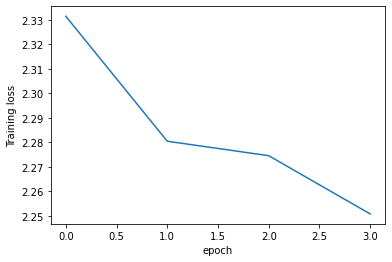

In [ ]:
# #Plot between Training loss vs epoch
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.ylabel('Training loss')
plt.xlabel('epoch')
plt.show()


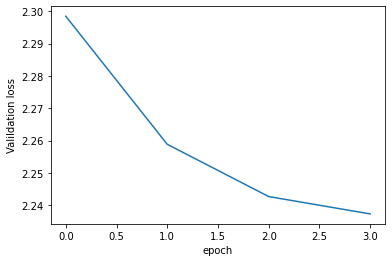

In [ ]:
# #Plot between Validation Loss vs epoch
plt.plot(history.history['val_loss'])
plt.ylabel('Valildation loss')
plt.xlabel('epoch')
plt.show()

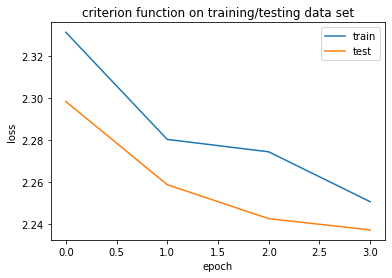

In [ ]:
#Plot of criterion function on training/testing data set
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('criterion function on training/testing data set')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
#Calculation of Training and Testing Error
Training_error=(history.history['accuracy'])
Validation_error=(history.history['val_accuracy'])
for i in range(len(Training_error)):
  Training_error[i]= 1- Training_error[i]
for i in range(len(Validation_error)):
  Validation_error[i]= 1- Validation_error[i]



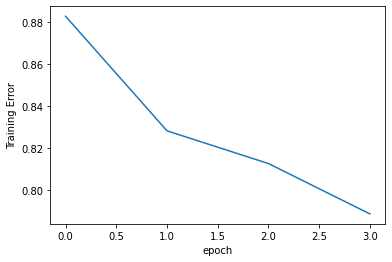

In [ ]:
#Calculation of Training Error
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(Training_error)
plt.ylabel('Training Error')
plt.xlabel('epoch')
plt.show()

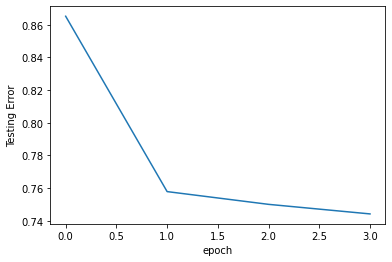

In [ ]:
#Calculation of Testing Error
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(Validation_error)
plt.ylabel('Testing Error')
plt.xlabel('epoch')
plt.show()